## Import Necessary Functions

These are required to utilize functions specific for data analysis and visualisations.

In [76]:

# For data wrangling 
import numpy as np
import pandas as pd

# For visualisation
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.options.display.max_rows = None
pd.options.display.max_columns = None

## Read the Data

In [77]:

# Direct link to the CSV file on Google Drive
csv_url = 'https://drive.google.com/uc?id=14HTdhAmJd_U3mJDnwLHPbu6pvh-Yv0vu'

# Read the CSV file from the URL
df = pd.read_csv(csv_url)

df.shape


(10000, 14)

The DataFrame has 1000 rows with 14 attributes. We continue to identify what attributes will be necessary and what data manipulation needs to be carried out before Exploratory analysis and prediction modelling can be done. 


## Initital Exploration

In [78]:
# A quick look
df.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


The .head(5) pandas function generates a well-structured format of the csv file with the first 5 rows organised.

In [91]:
# What attributes do we have? 
list(df.columns)

['CreditScore',
 'Geography',
 'Gender',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Exited']

In [79]:

# Description of the data 
print(df.describe()) 

         RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000      7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000     10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count   10000.000000   10000.000000  10000.00000    10000.000000   
mean    76485.889288       1.530200      0.70550        0.515100   
std     62397.405202       0.581654      0.45584        0.499797   
min         0.000000     

In [80]:
# Check columns list and missing values

df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

No missing values!

In [81]:
# Get unique count for each variable
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

From the above, we will not require the first 2 attributes as these are specific to a customer. For data privacy, we remove the surname as well.

In [82]:
# Drop the columns as explained above
df = df.drop(["RowNumber", "CustomerId", "Surname"], axis = 1)

The parameter axis = 1 specifies we want to drop these labels from the column. 

We will exclude RowNumber, CustomerId and Surname for reasons explained above.

In [83]:
# Review the top rows of what is left of the data frame
print(df.head(5))
print(df.shape)

   CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          619    France  Female   42       2       0.00              1   
1          608     Spain  Female   41       1   83807.86              1   
2          502    France  Female   42       8  159660.80              3   
3          699    France  Female   39       1       0.00              2   
4          850     Spain  Female   43       2  125510.82              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0          1               1        101348.88       1  
1          0               1        112542.58       0  
2          1               0        113931.57       1  
3          0               0         93826.63       0  
4          1               1         79084.10       0  
(10000, 11)


Notice we now have 1000 rows and only 11 attributes. 

In [84]:
# Check variable data types
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

So we mostly have categorical variables and 5 continuous variables.

## Exploratory Data Analysis

Here our main interest is to get an understanding as to how the given attributes relate too the 'Exit' status.



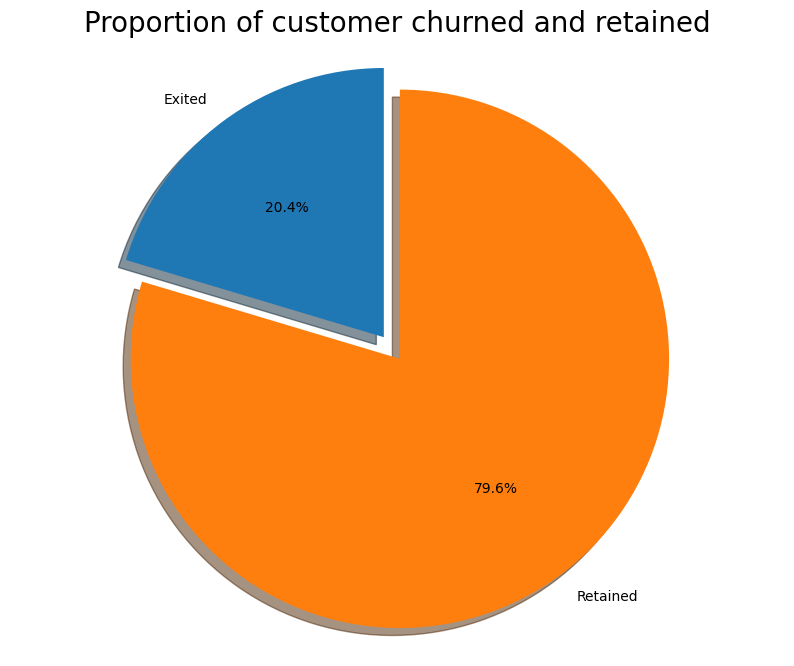

In [85]:
labels = 'Exited', 'Retained'
sizes = [df.Exited[df['Exited']==1].count(), df.Exited[df['Exited'] ==0].count()]  # count how many customers have left and continued to stay 
explode = (0, 0.1) # this simply offsets a chunk of the pie chart from the centre to emphasise it 
fig1, ax1 = plt.subplots(figsize=(10, 8)) #creates a new figure and a set of subplots, specifying the figure size to be 10 by 8 inches.
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', 
        shadow=True, startangle=90)  #sizes is the data, autopct formats the percentage display on the slices to one decimal place, 
ax1.axis('equal') #This ensures that the pie chart is a perfect circle by setting equal aspect ratio for the axes.
plt.title("Proportion of customer churned and retained", size = 20)
plt.show()

So we see 20.4% of the customers have churned (stopped using the bank's services). So for our model we could assume that roughly 20% of customers will churn, as that is the observed rate in the data. The bank will be more interested in the customers that have left as opposed to accurately predicting the customeres who have stayed, so we need to ensure that the chosen model does predict with great accuracy this 20%.  

# We first review Exited vs Churned in relation to the categorical variables

We want to analyse the number of individuals who exited in relation to a categorical variable. For instance, we want to determine how many customers either exited or remained in Germany.

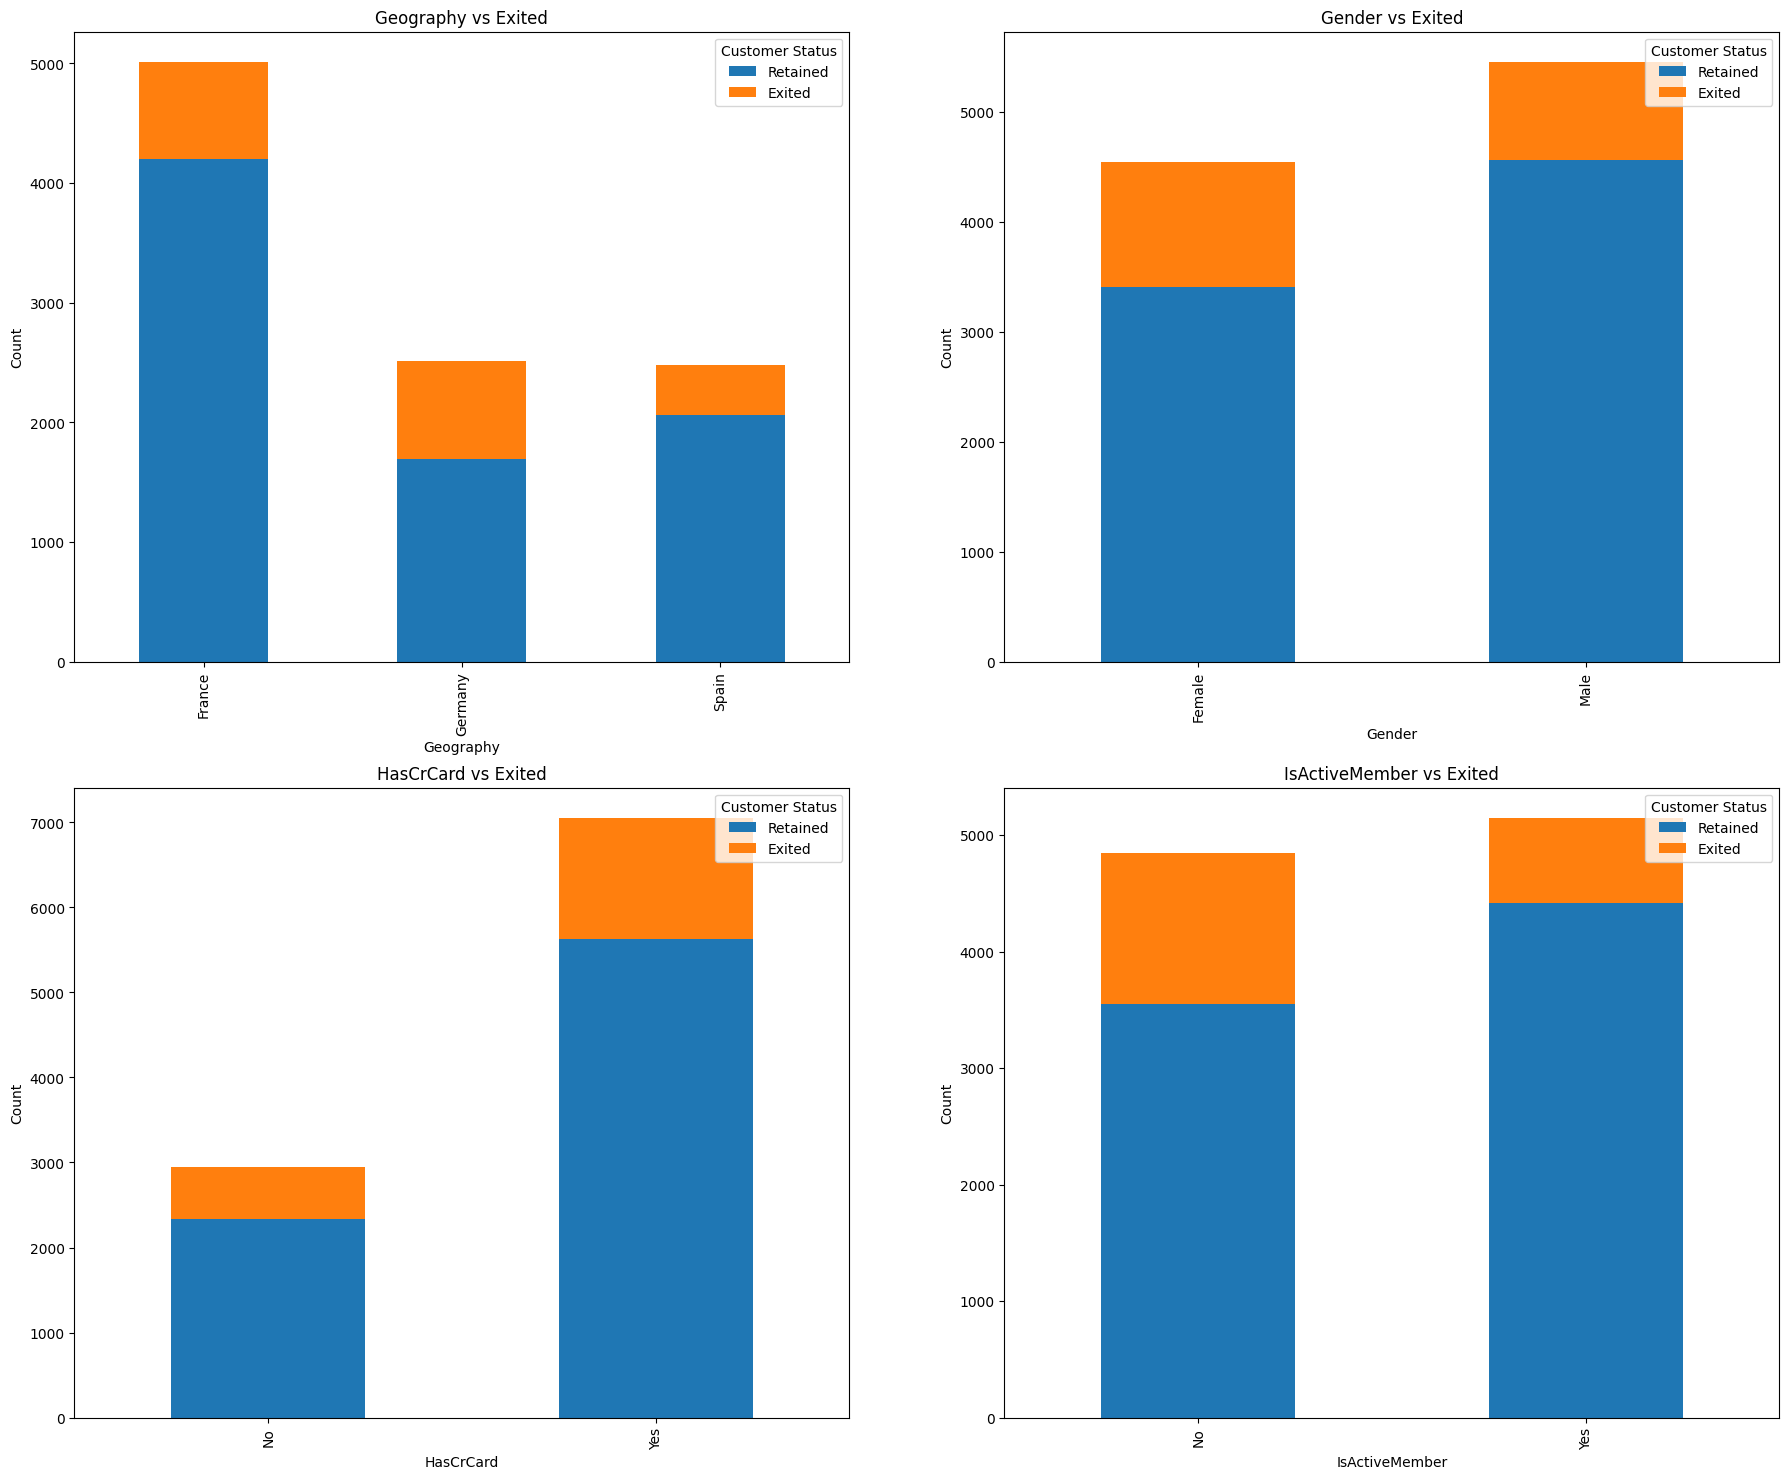

In [86]:

# We count the frequency of each combination of 'Geography' and 'Exited' 
fig, axis = plt.subplots(2, 2, figsize=(22, 18))

# For Geography column
geo_exit_counts = df.groupby(['Geography', 'Exited']).size().unstack()
geo_exit_counts.plot(kind='bar', stacked=True, ax=axis[0, 0])

axis[0,0].set_title('Geography vs Exited')
axis[0,0].set_ylabel('Count')
axis[0,0].set_xlabel('Geography')
axis[0,0].legend(['Retained','Exited'], title = "Customer Status", loc='upper right')

# For gender column
gend_exit_counts = df.groupby(['Gender','Exited']).size().unstack()
gend_exit_counts.plot(kind = 'bar', stacked = True, ax = axis[0,1])

axis[0,1].set_title('Gender vs Exited')
axis[0,1].set_ylabel('Count')
axis[0,1].set_xlabel('Gender')
axis[0,1].legend(['Retained','Exited'], title = "Customer Status", loc='upper right')

# For how many had a credit card
hasCrCard_exit_counts = df.replace({'HasCrCard':{1:'Yes',0:'No'}}).groupby(['HasCrCard','Exited']).size().unstack() #Temporarily changed the values of HasCrCard for ease of understanding visuals
hasCrCard_exit_counts.plot(kind = 'bar', stacked = True, ax = axis[1,0])


axis[1,0].set_title('HasCrCard vs Exited')
axis[1,0].set_ylabel('Count')
axis[1,0].set_xlabel('HasCrCard')
axis[1,0].legend(['Retained','Exited'], title = "Customer Status", loc='upper right')

# For how many are active members
isActiveMember_exit_counts = df.replace({'IsActiveMember':{1:'Yes',0:'No'}}).groupby(['IsActiveMember','Exited']).size().unstack()
isActiveMember_exit_counts.plot(kind = 'bar', stacked = True, ax =axis[1,1])

axis[1,1].set_title('IsActiveMember vs Exited')
axis[1,1].set_ylabel('Count')
axis[1,1].set_xlabel('IsActiveMember')
axis[1,1].legend(['Retained','Exited'], title = "Customer Status", loc='upper right')


fig, axis = plt.subplots(2,2,figsize = (20,12))


# Next we review how the continuous data attributes relates to Exited vs Retained 

/var/folders/5b/5l6jp2zn0sn5pggqy7bzs4b00000gn/T/ipykernel_5488/3322331906.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axis[0][0].boxplot([df[df['Exited'] == 0]['CreditScore'], df[df['Exited'] == 1]['CreditScore']],


Text(0, 0.5, 'Credit Score')

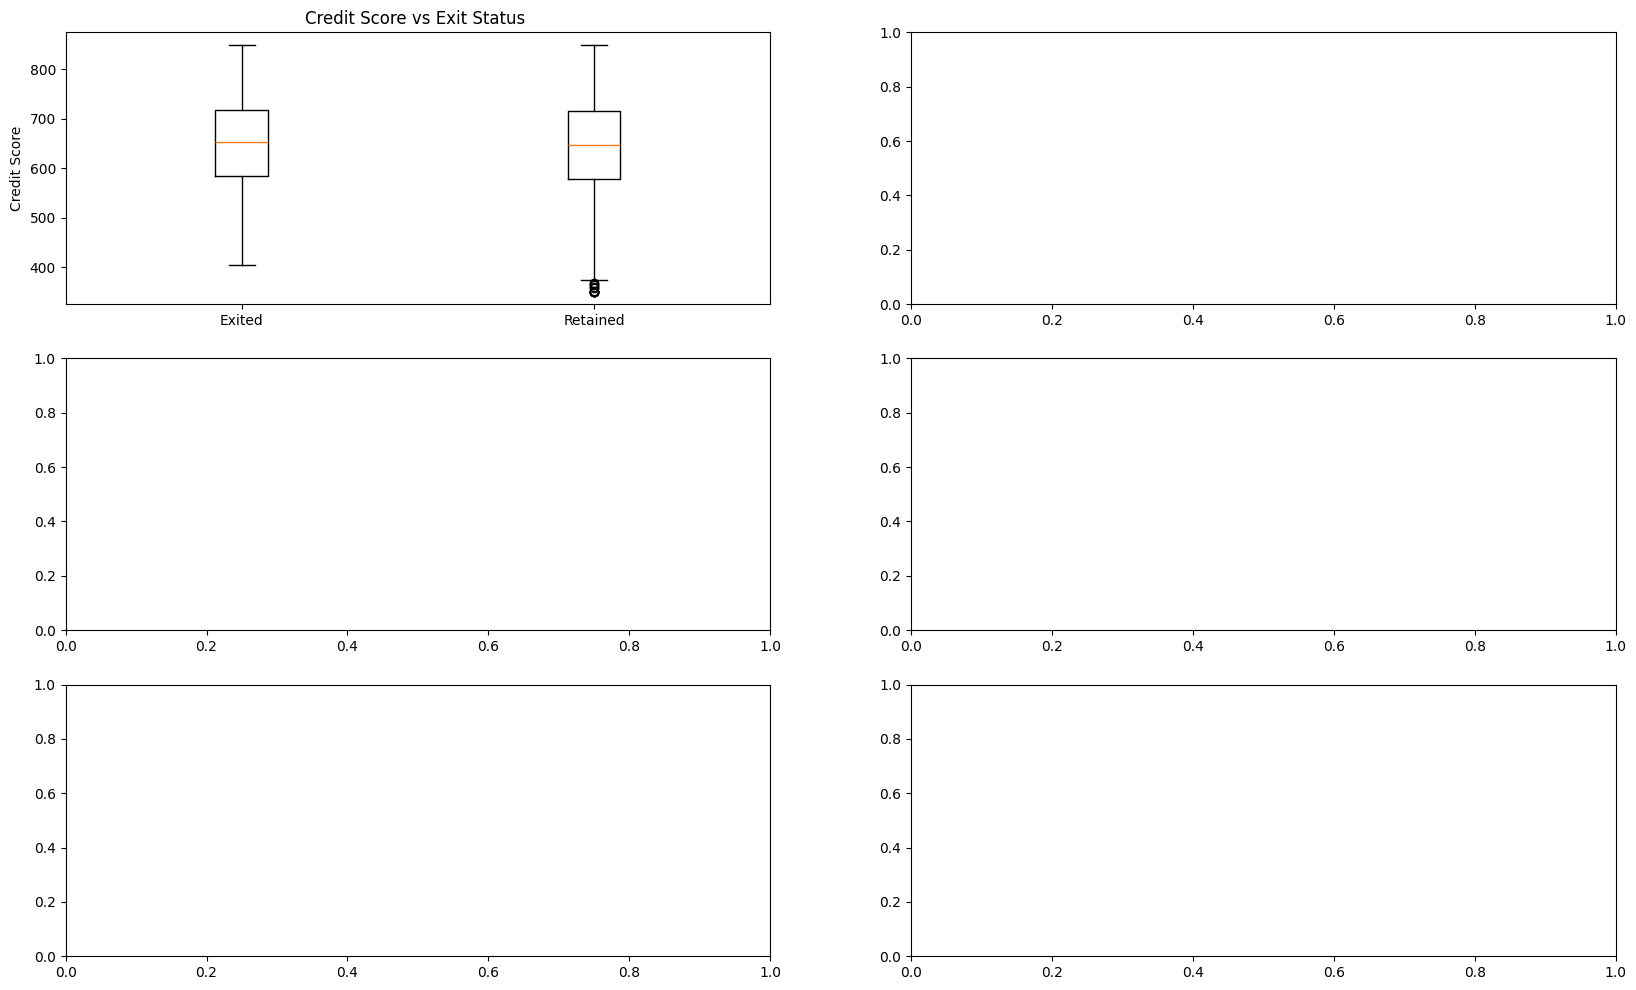

In [98]:
fig, axis = plt.subplots(3, 2, figsize=(20, 12))



axis[0][0].boxplot([df[df['Exited'] == 0]['CreditScore'], df[df['Exited'] == 1]['CreditScore']], 
                    labels=['Exited', 'Retained'])
axis[0][0].set_title('Credit Score vs Exit Status ')
axis[0][0].set_ylabel('Credit Score')
